In [30]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
import seaborn

# 取得する日の範囲を指定する
start = datetime.datetime(2001, 1, 1)
end = datetime.datetime(2017, 7, 1)

# Yahoo ファイナンスから、 ^N225 (日経平均株価指数) を
# とってくる。

N225 = web.DataReader('^N225', 'yahoo', start, end)

plt.title('Nikkei 255')

# fill_between でその日の最高値と最低値をプロットする
plt.fill_between(f.index, f['Low'], f['High'], color="r", alpha=0.2)

# plot で、始値をプロットする。
# 自動的に Index が Date になっているので、横軸が時間になる。

N225_pure = N225.dropna()
print (N225_pure)

plt.plot()

                    Open          High           Low         Close  \
Date                                                                 
2001-01-04  13898.089844  13990.570313  13667.679688  13691.490234   
2001-01-05  13763.219727  13947.059570  13725.459961  13867.610352   
2001-01-09  13732.849609  13732.849609  13460.820313  13610.509766   
2001-01-10  13593.160156  13593.160156  13349.150391  13432.650391   
2001-01-11  13433.089844  13436.610352  13123.809570  13201.070313   
2001-01-12  13246.200195  13451.950195  13246.200195  13347.740234   
2001-01-15  13450.280273  13573.549805  13441.519531  13506.230469   
2001-01-16  13561.730469  13598.200195  13442.089844  13584.450195   
2001-01-17  13593.830078  13688.900391  13476.549805  13667.629883   
2001-01-18  13734.790039  13931.910156  13723.209961  13873.919922   
2001-01-19  13956.339844  14186.620117  13947.919922  13989.120117   
2001-01-22  14010.070313  14039.400391  13841.030273  14032.419922   
2001-01-23  13966.63

[]

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2009-01-01  90.650002  91.250000  87.559998  90.667000  90.667000     0.0
2009-01-02  90.660004  92.370003  90.660004  91.790001  91.790001     0.0
2009-01-05  91.790001  93.529999  91.050003  93.217003  93.217003     0.0
2009-01-06  93.220001  94.566002  92.870003  93.379997  93.379997     0.0
2009-01-07  93.365997  94.059998  92.419998  92.680000  92.680000     0.0
2009-01-08  92.721001  92.886002  90.849998  91.360001  91.360001     0.0
2009-01-09  91.370003  91.550003  90.150002  90.370003  90.370003     0.0
2009-01-12  90.370003  90.370003  88.890999  89.430000  89.430000     0.0
2009-01-13  89.419998  89.842003  88.820000  89.341003  89.341003     0.0
2009-01-14  89.360001  89.949997  88.620003  89.160004  89.160004     0.0


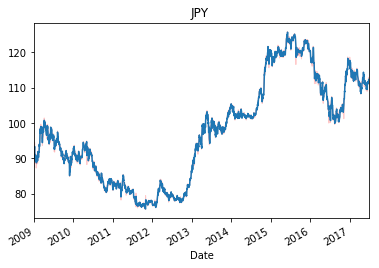

In [21]:
# 取得する日の範囲を指定する
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2017, 7, 1)

# Yahoo ファイナンスから、 ^N225 (日経平均株価指数) を
# とってくる。

f = web.DataReader('JPY=X', 'yahoo', start, end)

plt.title('JPY ')

# fill_between でその日の最高値と最低値をプロットする
plt.fill_between(f.index, f['Low'], f['High'], color="r", alpha=0.2)

# plot で、始値をプロットする。
# 自動的に Index が Date になっているので、横軸が時間になる。

f['Close'].plot()
print (f[:10])
plt.show()

In [41]:
total_num = (len(N225_pure))
N225_price = N225_pure['Adj Close'].values.astype('float32')
N225_price = N225_price.reshape(total_num, 1)

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
N225_price = scaler.fit_transform(N225_price)
print (N225_price)

[[ 0.48045224]
 [ 0.49320251]
 [ 0.47458965]
 ..., 
 [ 0.9465999 ]
 [ 0.95310754]
 [ 0.93957895]]


In [51]:
train_size = int(len(N225_price) * 0.80)
test_size = len(N225_price) - train_size
train, test = N225_price[0:train_size,:], N225_price[train_size:len(N225_price),:]
print(len(train), len(test))

3235 809


In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.cross_validation import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GTX 775M (0000:01:00.0)
/Users/ray/anaconda/envs/pure_theano/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [63]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))

In [64]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

/Users/ray/anaconda/envs/pure_theano/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/Users/ray/anaconda/envs/pure_theano/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  import sys


compilation time :  0.004456996917724609


/Users/ray/anaconda/envs/pure_theano/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


In [65]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=20,
    validation_split=0.05)

Train on 3071 samples, validate on 162 samples
Epoch 1/20
3071/3071 [==============================] - 0s - loss: 0.0779 - val_loss: 0.0604
Epoch 2/20
3071/3071 [==============================] - 0s - loss: 0.0200 - val_loss: 0.0168
Epoch 3/20
3071/3071 [==============================] - 0s - loss: 0.0100 - val_loss: 0.0026
Epoch 4/20
3071/3071 [==============================] - 0s - loss: 0.0025 - val_loss: 3.0205e-04
Epoch 5/20
3071/3071 [==============================] - 0s - loss: 0.0015 - val_loss: 0.0020
Epoch 6/20
3071/3071 [==============================] - 0s - loss: 0.0013 - val_loss: 2.8670e-04
Epoch 7/20
3071/3071 [==============================] - 0s - loss: 0.0014 - val_loss: 2.9627e-04
Epoch 8/20
3071/3071 [==============================] - 0s - loss: 0.0013 - val_loss: 3.2969e-04
Epoch 9/20
3071/3071 [==============================] - 0s - loss: 0.0013 - val_loss: 5.6741e-04
Epoch 10/20
3071/3071 [==============================] - 0s - loss: 0.0012 - val_loss: 4.1206e-0

[[ 0.52492267]]
[[ 1.10820603]]
[[ 2.29533792]]
[[ 4.66466236]]
[[ 7.88333178]]
[[ 0.52492267]
 [ 1.10820603]
 [ 2.29533792]
 [ 4.66466236]
 [ 7.88333178]]


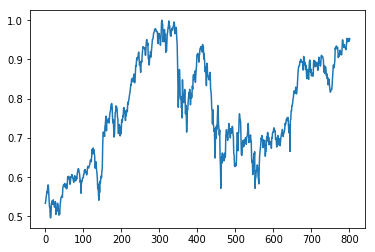

In [66]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)

In [81]:
# 取得する日の範囲を指定する
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2017, 7, 1)


N225 = web.DataReader('^N225', 'yahoo', start, end)
fx = web.DataReader('JPY=X', 'yahoo',start,end)
df_N225_fx = N225.merge(fx, how='outer',left_index=True, right_index=True)
import os
filename = "N225_forex.csv"
path = os.path.join("..","data",filename)
df_N225_fx.to_csv(path)



In [85]:
N225_pure = df_N225_fx.dropna()
total_num = (len(N225_pure))
N225_price = N225_pure.loc[:,'Open_x':'Adj Close_y'].values.astype('float32')
N225_price = N225_price.reshape(total_num, 11)

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
N225_price = scaler.fit_transform(N225_price)
print (N225_price)

[[ 0.13934523  0.14630514  0.14229494 ...,  0.31585395  0.35428762
   0.35428762]
 [ 0.14935905  0.14945632  0.14537668 ...,  0.35298932  0.35759175
   0.35759175]
 [ 0.14963245  0.16059697  0.15088511 ...,  0.34380734  0.34340167
   0.34340167]
 ..., 
 [ 0.9501127   0.94927698  0.95273685 ...,  0.74052227  0.73886073
   0.73886073]
 [ 0.94434679  0.94741458  0.94733059 ...,  0.74645984  0.74222577
   0.74222577]
 [ 0.95240331  0.95046753  0.95361924 ...,  0.73819625  0.73523223
   0.73523223]]


In [87]:
train_size = int(len(N225_price) * 0.80)
test_size = len(N225_price) - train_size
train, test = N225_price[0:train_size,:], N225_price[train_size:len(N225_price),:]
print(len(train), len(test))

1460 365


In [92]:
# convert an array of values into a dataset matrix
def create_dataset(dataset):
    look_back = 1
    dataX, dataY = [], []
    for i in range(len(dataset)-1):
        dataX.append(dataset[i])
        dataY.append(dataset[i+1, 4]) #predict
    return (np.array(dataX), np.array(dataY))


In [93]:
train = create_dataset(train)
test = create_dataset(test)

In [94]:
import pickle
path = os.path.join("..","data","Train_N225_forex.pickle")
with open(path, mode='wb') as f:
    pickle.dump((train, test),f)

In [98]:
with open(path, mode='rb') as f:
    dataset = pickle.load(f)

AttributeError: 'tuple' object has no attribute 'shape'